In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.weightstats import ztest as ztest
from statsmodels.stats.proportion import proportions_ztest as propztest
from scipy import stats
import random as rm

In [58]:
df = pd.read_excel(r"C:\Users\logan\Documents\ex7.xlsx")
names = df.columns
df

,1,0
0,0,0
1,0,1
2,0,1
3,0,0
4,1,1
5,1,0
6,1,0
7,1,1
8,1,0


In [59]:
array = df.to_numpy()
columns = array.shape[1]
smpl_a = array[:,0]
if columns == 2:
    smpl_b = array[:,1]
if columns >= 3:
    x = array[:, 1:columns]
    lin_x = []
    for i in range(1,columns): 
        lin_x.append(array[:,i])

In [60]:
tail_types = {"left":"less", "right":"greater", "two":"two-sided"}
tail_types2 = {"left":"smaller", "right":"larger", "two":"two-sided"}
colors = ['red', 'blue', 'black', 'green', 'pink', 'yellow', 'purple', 'orange']

In [61]:
#one sample CI
def one_smpl_CI():
    ans = input("Would you like a proportion or normal interval?")
    alpha = float(input("What is your level of confidence (express as a decimal)? "))
    
    if ans == 'normal':
        if len(smpl_a) < 30:
            ci_1smpl = stats.t.interval(confidence=alpha, df=len(smpl_a)-1, loc=np.mean(smpl_a), scale=stats.sem(smpl_a))
        else:
            ci_1smpl = stats.norm.interval(confidence=alpha, loc=np.mean(smpl_a), scale=stats.sem(smpl_a))
    elif ans == 'proportion':
        p_hat = np.mean(smpl_a)
        ci_1smpl = stats.norm.interval(confidence=alpha, loc= p_hat , scale=np.sqrt(p_hat*(1-p_hat)/len(smpl_a)))
    
    print(f"Your {alpha*100}% confidence interval is {ci_1smpl}")
    
    another = input("Would you like to perform another test (y/n)? ")
    if another == 'y':
        what_test()

In [62]:
#one sample test
def one_smpl_test():
    ans = input("Would you like a proportion or normal interval?")
    h0 = float(input("What is H0? "))
    
    if ans == 'normal':
        
        if len(smpl_a) < 30:
            tail = tail_types[input("How should the test be tailed (left, right, or two)? ")]
            test_1smpl = stats.ttest_1samp(smpl_a, popmean=h0, alternative=tail)
        
        else:
            tail = tail_types2[input("How should the test be tailed (left, right, or two)? ")]
            z, p = ztest(smpl_a, alternative = tail, value = h0)
            test_1smpl = f"Your Z statistic is {z} and your p value is {p}"
    
    elif ans == 'proportion':
        tail = tail_types2[input("How should the test be tailed (left, right, or two)? ")]
        suc = np.count_nonzero(smpl_a)
        n = len(smpl_a)
        z, p = propztest(suc, n, alternative = tail, value = h0)
        test_1smpl = f"Your Z statistic is {z} and your p value is {p}"
        
    
    print(test_1smpl)
    
    another = input("Would you like to perform another test (y/n)? ")
    if another == 'y':
        what_test()

In [63]:
#two sample CI
def two_smpl_CI():
    ans = input("Would you like a proportion or normal interval?")
    alpha = float(input("What is your level of confidence (express as a decimal)? "))

    if ans == 'normal':
    
        n1 = smpl_a.size;n2 = smpl_b.size
        x1 = np.mean(smpl_a);x2 = np.mean(smpl_b)
        v1 = np.var(smpl_a);v2 = np.var(smpl_b)
        delta = x1-x2
    
        if n1 >= 30:
            var = np.sqrt(v1/n1 + v2/n2)
            ci_2smpl = stats.norm.interval(confidence=alpha, df=n1-1, loc=delta, scale=var)
    
        else:
            pooled_var = ((n1-1)*v1 + (n2-1)*v2)/(n1+n2-2)
            ci_2smpl = stats.t.interval(confidence=alpha, df=n1-1, loc=delta, scale=pooled_var)
    
    elif ans == 'proportion':
        n1 = len(smpl_a); n2 = len(smpl_b)
        p_hat_a = np.mean(smpl_a);p_hat_b = np.mean(smpl_b)
        delta = p_hat_a - p_hat_b
        var = np.sqrt(p_hat_a*(1-p_hat_a)/n1 + p_hat_b*(1-p_hat_b)/n2)
    
        ci_2smpl = stats.norm.interval(confidence=alpha, loc= delta , scale=var)
        
    
    print(f"Your {alpha*100}% confidence interval is {ci_2smpl}")
    
    another = input("Would you like to perform another test (y/n)? ")
    if another == 'y':
        what_test()

In [64]:
#two sample test
def two_smpl_test():
    ans = input("Would you like a proportion or normal test?")
    while ans != 'normal' and ans != 'proportion':
        ans = input("Would you like a proportion or normal test?")

    h0 = float(input("What is H0? "))
    if ans == 'normal':
        if len(smpl_a) < 30:
            tail = tail_types[input("How should the test be tailed (left, right, or two)? ")]
            test_2smpl = stats.ttest_ind_from_stats(mean1=np.mean(smpl_a), std1=stats.sem(smpl_a), nobs1=len(smpl_a), 
                                         mean2=np.mean(smpl_b), std2=stats.sem(smpl_b), nobs2=len(smpl_b), alternative=tail)
        else:
            tail = tail_types2[input("How should the test be tailed (left, right, or two)? ")]
            z, p = ztest(smpl_a, smpl_b, alternative = tail, value = h0)
            test_2smpl = f"Your Z statistic is {z} and your p value is {p}"

    elif ans == 'proportion':
        tail = tail_types2[input("How should the test be tailed (left, right, or two)? ")]
        suc_a = np.count_nonzero(smpl_a); suc_b = np.count_nonzero(smpl_b)
        n_a = len(smpl_a); n_b = len(smpl_b)
        suc = np.array([suc_a, suc_b]);n = np.array([n_a, n_b])
        z, p = propztest(suc, n, alternative = tail, value = h0)
        test_2smpl = f"Your Z statistic is {z} and your p value is {p}"

    print(test_2smpl)
    
    another = input("Would you like to perform another test (y/n)? ")
    if another == 'y':
        what_test()


In [65]:
#linear regression
def lin_reg():
    print(stats.linregress(smpl_a, smpl_b))
    plt.scatter(smpl_a,smpl_b, **{"color":"black"})
    b0, b1 = np.polyfit(smpl_a, smpl_b, 1)
    plt.plot(smpl_a, b0*smpl_a+b1, **{"color":"red"})
    plt.title(f'{names[0]} vs {names[1]}', fontweight = "bold")
    plt.show()

In [66]:
#multiple regression():
def mult_reg(y, x):
    color = rm.sample(colors, len(lin_x))
    for i in range(len(lin_x)):
        plt.scatter(lin_x[i], y, **{"color":f"{color[i]}"})
        b0, b1 = np.polyfit(y, lin_x[i], 1)
        plt.plot(b0*lin_x[i]+b1, lin_x[i], **{"color":f"{color[i]}"})
        plt.title(f'{names[0]} vs {names[1::]}', fontweight = "bold")
    plt.xlim(np.min(lin_x) - 0.05* abs(np.mean(lin_x)),np.max(lin_x)+ 0.05*abs(np.mean(lin_x))); plt.ylim(np.min(y) - 0.05* abs(np.mean(y)), np.max(y)+ 0.05* abs(np.mean(y)))
        
    constant = np.ones(len(x))
    new_x = np.column_stack((x, constant))
    results = sm.OLS(y, new_x).fit()
    print(results.summary())

descriptive statistics:
              1         0
count  9.000000  9.000000
mean   0.555556  0.444444
std    0.527046  0.527046
min    0.000000  0.000000
25%    0.000000  0.000000
50%    1.000000  0.000000
75%    1.000000  1.000000
max    1.000000  1.000000


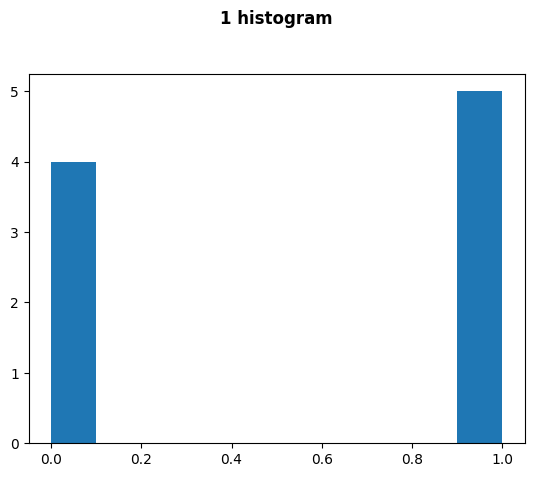

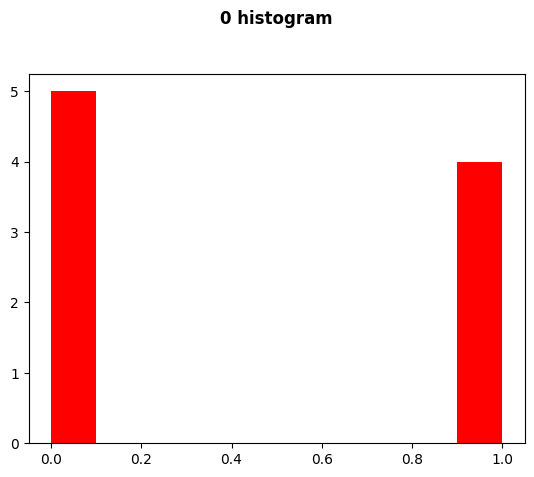

You can perform a 'two sample CI', 'two sample test', or 'linear regression'
note: if performing a proportion test, please format your data with success counted by a binary 1 = true, 0 = false system.
note: if performning a regression, please format your data so that x is the first column.


What type of test would you like to perform?  two sample test
Would you like a proportion or normal test? proportion
What is H0?  0.5
How should the test be tailed (left, right, or two)?  two


Your Z statistic is -1.6499158227686106 and your p value is 0.09896015401940585


Would you like to perform another test (y/n)?  n


In [67]:
def what_test():
    one_sample_tests = ['one sample CI', 'one sample test', 'one sample proportion test']
    two_sample_tests = ['two sample CI', 'two sample test', 'two sample proportion test', 'linear regression']
    multiple_sample_tests = ['multiple regression']

    print("descriptive statistics:",
          df.describe(), sep = "\n")
    plt.hist(smpl_a)
    plt.title(f'{names[0]} histogram\n\n', fontweight = "bold");plt.show()
    
    if columns == 1:
        print("You can perform a 'one sample CI' or 'one sample test'")
        print("note: if performing a proportion test, please format your data with success counted by a binary 1 = true, 0 = false system.")
        test_type = input("What type of test would you like to perform? ")
        while test_type not in one_sample_tests:
            test_type = input("What type of test would you like to perform? ")
        if test_type == 'one sample CI':
            one_smpl_CI()
        elif test_type == 'one sample test':
            one_smpl_test()
        elif test_type == 'one sample proportion test':
            one_smpl_prop()
        
    elif columns ==2:
        plt.hist(smpl_b, color = 'red')
        plt.title(f'{names[1]} histogram\n\n', fontweight = "bold");plt.show()
        print("You can perform a 'two sample CI', 'two sample test', or 'linear regression'")
        print("note: if performing a proportion test, please format your data with success counted by a binary 1 = true, 0 = false system.",
              "note: if performning a regression, please format your data so that x is the first column.", sep = '\n')
        test_type = input("What type of test would you like to perform? ")
        while test_type not in two_sample_tests:
            test_type = input("What type of test would you like to perform? ")
        if test_type == 'two sample CI':
            two_smpl_CI()
        elif test_type == 'two sample test':
            two_smpl_test()
        elif test_type == 'two sample proportion test':
            two_smpl_prop()
        elif test_type == 'linear regression':
            lin_reg()
            another = input("Would you like to perform another test (y/n)? ")
            if another == 'y':
                what_test()
    elif columns >= 3:
        for i in range(columns-1):
            color = rm.sample(colors, len(lin_x))
            plt.hist(lin_x[i], **{'color':f'{color[i]}'})
            plt.title(f'{names[i+1]} histogram\n\n', fontweight = "bold");plt.show()

        print("You can perform a 'multiple regression'")
        print("note: if performing a regression, please format your data so that y is the first column.")
        test_type = input("What type of test would you like to perform? ")
        while test_type not in multiple_sample_tests:
            test_type = input("What type of test would you like to perform? ")
        if test_type == 'multiple regression':
            mult_reg(smpl_a, x)
            another = input("Would you like to perform another test (y/n)? ")
            if another == 'y':
                what_test()
what_test()